# C- Wind Turbine Induction Generator Design

## Project Specifications

In this project, a squirrel cage induction generator for the Northerl Energy's VIRA-250 wind turbine will be designed. The specifications are as follows:

Rated Power: 250 kW
Rated Wind Speed: 14 m/s
Rated Turbine Speed: 24.3 rpm
Gear Ratio: 31.2
Number of Poles: 8
Line to line voltage: 400 V
Frequency: 50 Hz
Rated Speed: 758 rpm
Gearbox: (Coupled from wind turbine blade)
Insulation Class: F

In [18]:
from math import sqrt,sin,cos,pi,tan
Prated=250000; # rated power in W
Wrated=14; # rated wind speed in m/s
n=31.2; # gear ratio
m=3; # number of phases
p=8; # number of poles
pp=p/2; # pole pair of the m/c
V_ll=400; # line-to-line voltage
fs=50; # line frequency
nrated=758; # rated speed in rpm
eff=0.9; # targeted efficiency 
pf=0.85; # targeted power factor

## Main Dimensions of Stator Core

The project will start finding stator and rotor dimensions. Firstly, we will calculate stator bore diameter.

In [16]:
Ke=0.98-0.005*pp; # eq. 15.1 from Boldea
Sgap=(Ke*Prated)/(eff*pf); # air-gap apparent power in VA
print('Airgap apparent power is',round(Sgap,2),'VA.')

Airgap apparent power is 313725.49 VA.


By using the figure below, I have accepted machine constant as 235 kJ/m3.

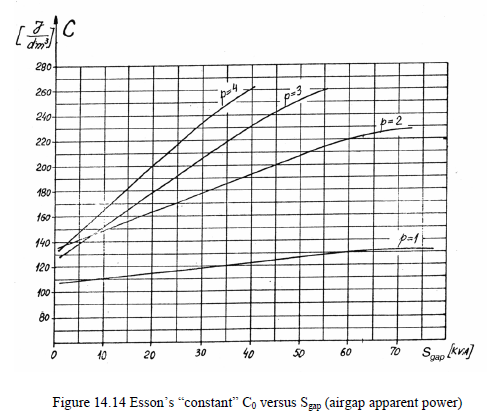

In [12]:
from IPython.display import Image
Image(filename='essons_constant.png', width=400, height=400)

In [13]:
C0=235000; # Esson's constant in J/m3 using 14.14
λ=2.5; # Stack aspect ratio for pole number of 8 from Table 15.1

We can now find stator bore diameter, stack length, pole pitch and defining number of stator slots per pole we can find slot pitch.

In [21]:
Dis=((2*(pp**2)*Sgap)/(pi*λ*fs*C0))**(1./3.); # stator bore diameter in m
L=(λ*pi*Dis)/(2*pp); # stack length in m
τ=(pi*Dis)/(2*pp); # pole pitch in m
q=4; # number of stator slots per pole (selecting high is beneficial)
τs=τ/(m*q); # slot pitch in m
print ('Stator bore diameter is',round(Dis,2), 'm.')
print ('Stack length is',round(L,2), 'm.')
print ('Pole pitch is',round(τ,2), 'm.')
print ('Slot pitch is',round(τs,3), 'm.')

Stator bore diameter is 0.48 m.
Stack length is 0.47 m.
Pole pitch is 0.19 m.
Slot pitch is 0.016 m.


By using Table 15.2 from Boldea, Kd is selected to be 0.73.

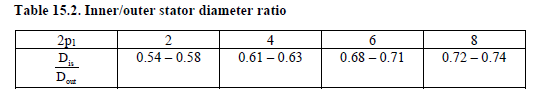

In [22]:
from IPython.display import Image
Image(filename='kd.png', width=400, height=400)

In [23]:
Kd=0.73;
Dout=Dis/Kd;
print ('Outer diameter is',round(Dout,2), 'm.')

Outer diameter is 0.65 m.


Air-gap is found from using equation 15.5. It is feasible to produce as seen.

In [25]:
g=(0.1+(0.012*(Prated**(1./3.))))/1000; # airgap in m
print('Airgap is',round(g,4),'m.')

Airgap is 0.0009 m.


# Stator Winding

Using 15.6, number of stator slots found and the winding structure will be identified.

In [26]:
Ns=2*pp*q*m; # number of stator slots

To eliminate 5th harmonics, 7/9 two layer chorded coil is selected. Now, let's find electrical angle between emfs in neighboring slots.

In [29]:
αec=(2*pi*pp)/Ns; # angle between emfs in neigboring slots
yt=7/9;
print ('Elec. angle between emfs is',round(αec,2), 'rad')

Elec. angle between emfs is 0.26 rad


Now, we can find zone factor, chording factor and stator winding factor.

In [31]:
Kq1=(sin(q*αec/2))/(q*(sin(αec/2))); # zone factor
Ky1=sin((pi/2)*yt); # chording factor
Kw1=Ky1*Kq1; # stator winding factor
print ('Zone factor is',round(Kq1,2),'.')
print ('Chording factor is',round(Ky1,2),'.')
print ('Stator winding factor is',round(Kw1,2),'.')

Zone factor is 0.96 .
Chording factor is 0.94 .
Stator winding factor is 0.9 .


Airgap flux density is selected to be 0.8 according to eq. 15.11.

In [ ]:
Bg=0.8; # airgap flux density
